In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
# fetch data 

travel_data = pd.read_csv('Datasets/tripadvisor_review_from_uci.csv')

travel_data.head()

,User ID,Church,Resort,Beach,Park,Theatre,Museum,Mall,Zoo,Restaurant,Pubs/bars
0,User 0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [3]:
travel_data.isna().sum()


User ID       0
Church        0
Resort        0
Beach         0
Park          0
Theatre       0
Museum        0
Mall          0
Zoo           0
Restaurant    0
Pubs/bars     0
dtype: int64

In [4]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [5]:
# correl = subset_data.corr()
correl = travel_data.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [6]:
travel_data.columns

Index(['User ID', 'Church', 'Resort', 'Beach', 'Park', 'Theatre', 'Museum',
       'Mall', 'Zoo', 'Restaurant', 'Pubs/bars'],
      dtype='object')

In [7]:
cols = ['Church', 'Resort', 'Beach', 'Park', 'Theatre', 'Museum',
       'Zoo', 'Restaurant', 'Pubs/bars'] # Removing 'Mall' as it has too small stdev
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
subset_data = pd.DataFrame(sc.fit_transform(travel_data[cols]), columns = travel_data[cols].columns, index = travel_data.index)

In [8]:
subset_data.head()

,Church,Resort,Beach,Park,Theatre,Museum,Zoo,Restaurant,Pubs/bars
0,0.11,0.94,1.62,0.31,-0.32,1.07,-0.33,0.69,-1.18
1,0.39,1.77,2.09,0.38,1.10,2.48,-1.49,0.80,-1.49
2,1.00,-1.16,-0.60,-0.01,-1.60,-0.56,-0.26,-0.71,-0.93
3,-1.36,0.94,-0.92,0.13,-1.10,-0.60,0.91,0.00,0.19
4,-1.17,-0.32,0.21,0.13,1.37,0.33,-0.40,-1.07,-0.81


In [9]:
# Check if PCA using SVD gives same results
from sklearn.decomposition import PCA
# initializing the PCA transformer
pca = PCA(n_components = 2)
# dimensionality reduction:
data_pca = pd.DataFrame(pca.fit_transform(subset_data), index = subset_data.index)

Text(-1.9837192763032494, -0.12017223852905325, '0')

Text(-4.011487003354676, -0.319792299989451, '1')

Text(1.025387440766965, -1.1169388708566748, '2')

Text(1.1483258281888347, 0.4933040015515266, '3')

Text(-1.2702147281203746, -0.5417507384589487, '4')

Text(2.5493369346239305, 0.40435367944521605, '5')

Text(1.4344374177042212, -1.2032525349777174, '6')

Text(1.0627713640680998, -0.05308080106906826, '7')

Text(-0.8422502915329682, -0.6089320674176485, '8')

Text(0.8015139518961879, 1.7155791484579894, '9')

Text(-1.7046325065019454, 1.0349414341087289, '10')

Text(0.7781300676138794, 0.9800014526740125, '11')

Text(-1.4489169340027779, -0.7183166994444692, '12')

Text(-1.0062457777992957, 1.469131463830621, '13')

Text(-2.55929796833809, 0.8089267466450041, '14')

Text(-2.3205235556631183, -0.7911816991342472, '15')

Text(1.7232185541247766, -2.100730015169595, '16')

Text(-1.817301983122982, -0.07369939317737452, '17')

Text(-1.4008718408357346, 1.093848516149924, '18')

Text(-1.2267350521059361, -0.32972776781627944, '19')

Text(-0.42302398291174736, -1.18599955521897, '20')

Text(0.7770373330661744, -0.6481104411246933, '21')

Text(2.1801831870534008, -0.5659421845847881, '22')

Text(0.9455072245284944, -0.038331476697312676, '23')

Text(-0.8465971938677121, 0.27958441203040235, '24')

Text(-1.473075958180078, -2.2208253393084014, '25')

Text(-2.9799577001922684, -1.6250126194244991, '26')

Text(-0.7921252771427462, -0.9833107044002749, '27')

Text(2.1287594009985833, -0.8408122691859495, '28')

Text(-3.7314778806418993, 0.022932111808305955, '29')

Text(-1.6804906876322194, -0.5726904013489036, '30')

Text(-1.909171223221103, -1.856866240545691, '31')

Text(-2.1288561000262707, 0.845094402692518, '32')

Text(-0.2555619968880143, 1.3789597927711328, '33')

Text(1.377068379266335, 1.4053434498703257, '34')

Text(1.055627887157844, 0.7227622166241078, '35')

Text(1.4874820908979853, -0.4257803620979266, '36')

Text(1.5496281545179855, 0.6736414573748829, '37')

Text(-0.9532162318079679, -0.3661019576063965, '38')

Text(1.1302292905597453, -0.2224380375245382, '39')

Text(0.45335888555852855, -1.3257155780208796, '40')

Text(2.5288755427261997, -0.5677514928231905, '41')

Text(0.5025368695732478, -0.23547139879786902, '42')

Text(0.08736929766248668, 0.8468845395607523, '43')

Text(0.3006489449342444, 2.168699536688546, '44')

Text(1.9158418318794375, 0.5277335255027322, '45')

Text(1.518002358665497, 2.8217961711396113, '46')

Text(0.4149573219951304, -0.045448954040874345, '47')

Text(0.3885370094377455, 0.09422829002596382, '48')

Text(-2.019992423534804, -1.6294733221724724, '49')

Text(1.4319275794917874, 0.5287579747559513, '50')

Text(-0.2341767217422771, -0.5827931716170143, '51')

Text(-1.837125972572896, 0.5953123398257699, '52')

Text(0.04396487357010824, -0.35471785344079826, '53')

Text(1.7578858988917274, -0.10372086437033969, '54')

Text(1.7192664382877552, 0.033213597587082894, '55')

Text(-1.6678807295299967, -0.30274132605859366, '56')

Text(0.7236923680818076, -0.4195769137844979, '57')

Text(-2.825575592820657, -0.12242517770566644, '58')

Text(-1.5934800625123158, 0.22879399766386826, '59')

Text(-4.063497683541376, -1.4164349269623533, '60')

Text(2.747677628027608, -0.8976593248331595, '61')

Text(2.0972859546763605, 0.4619137703021307, '62')

Text(1.9084999756709335, 0.759361005343298, '63')

Text(0.7363868828037261, 0.334037924842905, '64')

Text(0.9139257181815171, -0.37988096431500884, '65')

Text(1.796574554285074, -2.0416545184156862, '66')

Text(1.008684907930995, -0.856921188420546, '67')

Text(0.35026743805096466, -1.231775148032364, '68')

Text(0.37761374479594695, -0.7685960584196991, '69')

Text(0.7368712333879635, -1.0607656765548938, '70')

Text(-1.9644641326956367, -1.423018731464042, '71')

Text(-0.536206926268767, 0.9881201713148337, '72')

Text(0.633307716666715, -0.6134163710814127, '73')

Text(-0.778702727129186, -0.13236860373469672, '74')

Text(-2.261307126364016, -1.1032691864869464, '75')

Text(1.7610719696155184, 0.09045929094357318, '76')

Text(-2.104230952887511, -0.43690664145751196, '77')

Text(1.9876812084720972, -1.1134772658970633, '78')

Text(0.39013874989296204, -0.8979319820572313, '79')

Text(2.207434867600365, 0.7279109623997055, '80')

Text(-0.0017617668724537474, 0.3508018767406316, '81')

Text(0.7314028893462763, -1.0675874333038389, '82')

Text(0.2580914931554245, -0.7415295152618927, '83')

Text(0.17691862838007702, 0.8194676863512047, '84')

Text(1.5746884626789306, 0.31709787247685134, '85')

Text(0.1097021646722879, -1.4632812975215865, '86')

Text(2.4868578862221815, -1.090878680860533, '87')

Text(-1.7706445954696375, -1.400466759477547, '88')

Text(-0.1320203542528094, -0.09557534180485147, '89')

Text(1.4452234739717016, 0.09775191939166353, '90')

Text(1.7058005689099185, 0.013739950445067836, '91')

Text(-2.601683561782705, -0.4655790526457601, '92')

Text(-2.825575592820657, -0.12242517770566644, '93')

Text(-3.213658619414425, -0.5815324861558294, '94')

Text(1.3177841509173795, 0.11871270842895897, '95')

Text(-1.0752512370430034, -0.0911968313924744, '96')

Text(0.0650738999115027, -0.04833497562627873, '97')

Text(-0.7683954008067858, 0.6345263363031793, '98')

Text(-0.6420830175448342, 3.751902155034195, '99')

Text(0.5033070117670143, 0.9214316558846566, '100')

Text(2.0291863873903138, 0.7221476681590405, '101')

Text(-2.2521747616824515, -0.1719074544807077, '102')

Text(1.7431283393134274, -0.6933379267990278, '103')

Text(2.8740700746017525, 0.13921581123919596, '104')

Text(-0.46181970587139326, -1.2012479611710052, '105')

Text(-0.8047237910294823, 2.2337170402203395, '106')

Text(2.234100371755505, -1.2286643230407785, '107')

Text(1.26858444162904, -0.8766140018144425, '108')

Text(-1.5523826663514486, 1.632574701466711, '109')

Text(-0.07115937720642733, 1.998113305593192, '110')

Text(0.7430017776916763, -1.0491549906828657, '111')

Text(-0.5527742763196812, 0.3393125413901484, '112')

Text(-0.27960214485778007, 0.37876285305590546, '113')

Text(-1.9644641326956367, -1.423018731464042, '114')

Text(-0.3169516533848305, 1.2086280630189652, '115')

Text(-0.8510776228958079, 0.17145522638505184, '116')

Text(0.15542496404456138, 0.34965623927278794, '117')

Text(0.30266931688053367, -0.7911610178951622, '118')

Text(0.5579751940404969, -1.6968227782506535, '119')

Text(-2.57179880082124, 0.3832917314953151, '120')

Text(-0.511907868612945, 0.49333221266513183, '121')

Text(-2.2363248684704926, -1.4307855384818426, '122')

Text(-0.8927896338355199, 0.04232581075738906, '123')

Text(-0.8332311077437937, -0.6653170078197052, '124')

Text(0.9131964138554375, -0.5286257657011681, '125')

Text(1.4262822277995162, -0.942372882718919, '126')

Text(-0.5607630627373468, -0.5978695666928393, '127')

Text(0.9359123505416074, 0.013799232950164475, '128')

Text(0.5450338869225329, -0.43807447275655426, '129')

Text(0.531634417214907, -1.905485372274036, '130')

Text(-2.1811528160740368, 1.0028902661436083, '131')

Text(-1.0763545623637607, 0.24917212736684904, '132')

Text(-1.6779544751375663, 0.860724314940339, '133')

Text(1.1969826821599447, 1.3521133174564495, '134')

Text(-1.1789345339414476, 2.2561278212951987, '135')

Text(-0.6423352004521249, 0.30967821958616487, '136')

Text(-0.8250245752802454, -0.11419161427862291, '137')

Text(0.6137271385186862, -0.20224716736955697, '138')

Text(2.2542569596096627, 0.9228807826002539, '139')

Text(1.224369861158446, 1.344019225042215, '140')

Text(1.2697479612474276, 0.26828415389301097, '141')

Text(0.14785900856273884, -0.8774261901598445, '142')

Text(0.7241956596933348, 0.699342853468017, '143')

Text(0.7103029548512589, 2.500100917976885, '144')

Text(0.7781300676138794, 0.9800014526740125, '145')

Text(-1.1816121897317866, -0.03613701475575289, '146')

Text(-1.5838570820207953, 1.3695138157902353, '147')

Text(-0.3807885295403646, 1.0552848715756216, '148')

Text(-1.6368602889920243, 0.25235572608654655, '149')

Text(0.38204034104883017, 0.5440345215972952, '150')

Text(0.33163269693208125, -0.20184878415007812, '151')

Text(1.0437958417592386, -0.33978401184327184, '152')

Text(0.37256495216241203, -1.1215008518889729, '153')

Text(0.6918071983699852, -0.43595272632228155, '154')

Text(1.233548781044757, 0.7817830268881427, '155')

Text(0.03737006128090679, 1.5622535531149861, '156')

Text(2.5666707647312124, -0.17770618590356593, '157')

Text(-2.388211246787271, -0.2093040918700243, '158')

Text(2.1418451626318435, -1.9857192553978589, '159')

Text(0.44311133108850465, -0.7785097751562357, '160')

Text(2.496035545239391, -0.5118488985132127, '161')

Text(-0.5527742763196812, 0.3393125413901484, '162')

Text(1.0083646107448334, 0.06910264176264014, '163')

Text(0.9183188212239038, -1.4430063211366773, '164')

Text(1.1481134097181014, -0.077433842184542, '165')

Text(-1.0097215070818828, -0.5602752297562802, '166')

Text(-0.015046120972322581, 1.4146779324495018, '167')

Text(-1.6563037242347571, -0.7310597106121373, '168')

Text(0.773616242237366, 0.51110486375061, '169')

Text(-0.4480185347284444, 2.414233293006028, '170')

Text(1.489093230735311, -0.4972232910059366, '171')

Text(1.371795869264157, -1.5418484310887173, '172')

Text(2.1025102050325697, 0.49087674501065576, '173')

Text(0.8535745081316441, 0.18457223536390233, '174')

Text(-0.9328011654007823, -0.3411397241195451, '175')

Text(0.9044677862629537, 0.8352409764268267, '176')

Text(1.297784894967404, 0.661438545200243, '177')

Text(1.1433185083727326, 0.6951159364736186, '178')

Text(1.0415241472870524, 0.519301691384008, '179')

Text(2.4938758550174107, 2.7724839520891043, '180')

Text(-1.7955331853702008, 0.4182420558338905, '181')

Text(-0.9702551652528639, -0.3168454115539497, '182')

Text(1.2905757108077744, -1.8165496443859273, '183')

Text(-3.0128013842208725, 0.859066040812838, '184')

Text(0.04832476474103292, 0.9676531414493552, '185')

Text(-0.4057459187319622, 0.21431653085424543, '186')

Text(1.9949839795976774, 0.5195925937254614, '187')

Text(-1.0310449801499408, 0.3422787593270094, '188')

Text(2.767334803477645, -0.2746121148098512, '189')

Text(-1.3696018939290877, -2.12640653081988, '190')

Text(-1.0937887197421485, -0.24820072245256988, '191')

Text(2.0190405436442855, 0.403808390223258, '192')

Text(0.9028966078486028, 1.03252543651336, '193')

Text(0.40471283194816654, 0.8502524771523478, '194')

Text(1.531193694751258, 0.40099103635851585, '195')

Text(0.9725312790611703, -1.558375481099228, '196')

Text(-1.9088652908564028, -0.21045594286357192, '197')

Text(1.8590245342696259, 0.6782258574769673, '198')

Text(-1.703877509499575, -0.5682691500791908, '199')

Text(-2.684615507449974, 1.0305880822136333, '200')

Text(0.526329564273798, 0.4456092122820973, '201')

Text(-1.3445947075015139, -1.2452980513112917, '202')

Text(1.3538716616869335, 0.7428126880999844, '203')

Text(0.8180039611470916, -0.6145031064571876, '204')

Text(2.0014024240687958, -1.4696788205853613, '205')

Text(0.36592810873640824, -0.104164018309817, '206')

Text(1.678651689158172, 0.9825382196690244, '207')

Text(0.2488955915304075, -2.744584860876159, '208')

Text(1.524865589103541, -0.6573951157238023, '209')

Text(0.8384707880668549, -0.49429594090151174, '210')

Text(-0.7665610806656618, -0.38654353202961866, '211')

Text(0.13464110667146664, -0.5817135311619033, '212')

Text(1.242528710532857, -0.7951672607356737, '213')

Text(3.075298393893696, -0.28744854142928816, '214')

Text(-2.2982042203376496, 0.5051563395311789, '215')

Text(1.5309799087390548, -0.7211674362613929, '216')

Text(0.15448805782387953, -1.1379860905333503, '217')

Text(-2.4835288239528026, 0.21417247987976942, '218')

Text(-0.7092267305919568, -0.10283021218975817, '219')

Text(-0.5310621937738891, 1.0046062444716, '220')

Text(1.8495640599962881, -1.9868648366880797, '221')

Text(-1.5742159007928118, -0.6716792143277026, '222')

Text(1.5942607518204805, 0.14878548427845367, '223')

Text(-2.7326468267575983, 0.17217736059236746, '224')

Text(1.1973374534626093, -0.3600836772454918, '225')

Text(-1.7260924737845191, -1.3974831632043256, '226')

Text(-0.16624808728465407, -0.5044328892610778, '227')

Text(0.7054160248225375, -0.05428664739531489, '228')

Text(-1.4198550902940423, -0.2521708425583169, '229')

Text(0.9794856613560412, 2.5823054635882303, '230')

Text(-2.3583473766699816, 0.5101037842906372, '231')

Text(1.3668745578962938, -1.724663839397794, '232')

Text(0.8349229254265536, -1.1405729533260334, '233')

Text(-1.7478897134220333, 1.3956726535164419, '234')

Text(0.40471283194816654, 0.8502524771523478, '235')

Text(-0.5693124005486956, -0.5411524382572527, '236')

Text(0.09265814741404055, 0.9052009107343354, '237')

Text(-0.7070777614789621, -0.7978758865875419, '238')

Text(5.087131642710101, -1.0867264686940556, '239')

Text(-1.3445947075015139, -1.2452980513112917, '240')

Text(-2.8849949244927813, 0.14620949509614697, '241')

Text(0.6159868213536863, 0.6335385323048616, '242')

Text(1.3745785816399956, 0.7851101077103, '243')

Text(2.487562307483067, 1.343182988754509, '244')

Text(0.6843427970723875, 0.2884007900509594, '245')

Text(2.5153355088360807, 0.014229127880902151, '246')

Text(-4.952629540415047, -1.6372761108688356, '247')

Text(1.7665635857983217, -0.16489896248714384, '248')

Text(0.40471283194816654, 0.8502524771523478, '249')

Text(-1.0329329073773819, -0.46634439883477885, '250')

Text(1.325513715498957, 0.7120673455095589, '251')

Text(-0.9825635685697733, -2.3942864806590602, '252')

Text(-1.4566870934677973, -1.0822131006954445, '253')

Text(0.5787398296518935, -0.9484028933778588, '254')

Text(-0.002928971077323525, 1.1108590839472199, '255')

Text(2.0792138814805345, 0.6338607070487265, '256')

Text(-2.1871146843238325, -0.42674524465563174, '257')

Text(2.0581002921201588, -0.22529591757276785, '258')

Text(-2.0393681968190798, -1.7063365011826332, '259')

Text(-0.2983544247418791, 0.5503403317724981, '260')

Text(-1.5386003332076708, 2.654388612177878, '261')

Text(0.8604739878070438, 1.1349349377815017, '262')

Text(-1.0381608506605886, 3.1406767585918924, '263')

Text(1.9764477881676712, 0.15129030070502078, '264')

Text(-1.408306385848765, -0.12154046462883399, '265')

Text(-2.2265447198541977, 0.4250588630039584, '266')

Text(-0.48469664230856974, 0.3926649611044554, '267')

Text(0.598466180762667, 0.2822239578993231, '268')

Text(-1.823408970193081, 0.4210374825994558, '269')

Text(0.4145498645356174, 0.6442758062631158, '270')

Text(0.9681539244513577, 0.3026388757023254, '271')

Text(-2.0703916302778773, -1.6850867400519776, '272')

Text(-2.2971286355575953, 0.1467594351004812, '273')

Text(-2.7448479154619436, -1.7022480217263645, '274')

Text(2.1621625615709235, -0.5430934413630777, '275')

Text(-0.8293146205563235, -0.4842952095420767, '276')

Text(-0.5293990193003391, 2.8007328633400816, '277')

Text(1.81352429804211, -2.6567523440505525, '278')

Text(0.020041506243143627, 0.3920674377454378, '279')

Text(0.16643167457211772, -1.5293596340191913, '280')

Text(0.08273567488259685, 1.9418399938490098, '281')

Text(-0.9581700958494108, -0.5028951256211217, '282')

Text(-1.4426206533150245, -0.21781505671803209, '283')

Text(0.5116962125767717, 0.026906932403684674, '284')

Text(2.1020062928661565, -0.015430208719439833, '285')

Text(-4.01324336381392, -1.1407987027467512, '286')

Text(-0.09548778117277684, 1.6937863675914842, '287')

Text(1.07453605365067, -0.9518480942550842, '288')

Text(0.897107423170443, -0.3692581706829557, '289')

Text(-2.078522074109437, 0.041500711259578715, '290')

Text(1.7369339536048305, -0.9180647482258163, '291')

Text(1.158698568470614, -0.01433790685325653, '292')

Text(1.5303091824807065, 2.0628285013721412, '293')

Text(2.1287594009985833, -0.8408122691859495, '294')

Text(0.04213350965467969, -1.1809678417744078, '295')

Text(0.3780311790951312, -0.9061510180593708, '296')

Text(0.11685276801859014, -1.6364421758888221, '297')

Text(-0.09828468475928727, -0.3353186013653014, '298')

Text(-0.30858854545684566, 0.7239289219162811, '299')

Text(1.9237611205196812, -0.05085190208822674, '300')

Text(-0.517832803844291, -1.2197770533105285, '301')

Text(0.019545399821686082, -0.8866469677131587, '302')

Text(1.1501844348089754, 0.49695709183525544, '303')

Text(-1.2398432935840693, 0.09415290337580134, '304')

Text(0.31941207555308904, -1.3283467145781238, '305')

Text(-0.28496617846459815, 0.822573153046543, '306')

Text(-2.671633212337173, 3.126932735993884, '307')

Text(2.0179796535883097, 0.7074187737851322, '308')

Text(-1.9801484013745023, -1.715403820385489, '309')

Text(0.6839910891365694, 1.1309953276508844, '310')

Text(1.4086452279204562, 0.7516391089295342, '311')

Text(-0.0918041407404967, -0.8204287128717072, '312')

Text(-1.8154879561892905, 0.6761294354402765, '313')

Text(-0.7993623137534583, 1.122555337542394, '314')

Text(0.29368762419447303, 0.44533935792959123, '315')

Text(-1.8867026483182052, 0.18130731915240425, '316')

Text(0.797640868637387, 0.3413255525805923, '317')

Text(-0.4112766308045968, -1.5410816162469287, '318')

Text(2.659035168914085, 0.1201164557665033, '319')

Text(1.038328642837049, 1.5279608515632683, '320')

Text(2.025499062256336, 1.7112973006149033, '321')

Text(-0.4047990865342516, -0.8633171205617737, '322')

Text(2.3318135335334156, -0.26273154365447376, '323')

Text(0.4477377089546443, 0.10256004421922987, '324')

Text(-1.9623945085458607, -0.5907586439190657, '325')

Text(-1.9023030848033748, 2.1427704306933824, '326')

Text(-3.0572899022145146, 0.48897060727144503, '327')

Text(-0.9015518879402848, -1.4125789840409484, '328')

Text(-0.4906912431183577, 0.4746188233096176, '329')

Text(0.23365839849483436, 3.8819067592573453, '330')

Text(-1.114316284741158, -1.5746807249895374, '331')

Text(0.9139257181815171, -0.37988096431500884, '332')

Text(-0.7584235360452871, -0.042337238612696323, '333')

Text(0.9311316350648763, -1.6177812072077715, '334')

Text(-1.396981663453227, -0.23483805122449541, '335')

Text(-0.8295259732025545, -1.4287673221394717, '336')

Text(2.5088899526935586, -1.1486294498107004, '337')

Text(-1.7716029370967021, 2.0227122041573105, '338')

Text(1.274837919097626, -0.553102743970938, '339')

Text(-2.7110664315447015, 1.0255202081142125, '340')

Text(-2.0698788390827536, 2.5443263205287456, '341')

Text(-0.09365803916045443, 0.6443851014002233, '342')

Text(-1.269234736062126, -0.2936938569701386, '343')

Text(0.22946408180104721, -1.5981931729662062, '344')

Text(2.176435605567663, 0.22853754909250654, '345')

Text(-0.5899141426384593, 2.172597279243127, '346')

Text(0.5647408890992067, 0.9456565873779896, '347')

Text(-1.674504563686583, -0.6615743235392828, '348')

Text(-2.6957371711566913, -0.6580050763687065, '349')

Text(1.0180140259394264, -1.0403976447306627, '350')

Text(1.5740334303156036, 0.43684486805663575, '351')

Text(-1.0031836588457836, 1.5312010245569798, '352')

Text(2.6400586716414716, 0.44219007444332786, '353')

Text(1.5865878341770343, -1.4191521140930052, '354')

Text(1.5392778955830708, -1.4141899770930708, '355')

Text(-0.5818459458630559, 0.42254950383614504, '356')

Text(1.9806275071870105, -1.7663130531668285, '357')

Text(-0.6557540704649434, 4.101817126721004, '358')

Text(1.9753150110528588, -2.571700460787601, '359')

Text(1.503364200800726, -0.3063620405852542, '360')

Text(-1.9366220142208852, 0.34573441902152896, '361')

Text(-3.213658619414425, -0.5815324861558294, '362')

Text(2.357876279330304, 0.6214117834125472, '363')

Text(-0.549695733550247, 1.857856746508193, '364')

Text(-1.4059375088896868, -1.2595583578669756, '365')

Text(-0.7313360336501367, 0.6080697727384546, '366')

Text(0.34814697607619066, 1.6237127151991915, '367')

Text(0.1810025301645746, -0.6671966473948469, '368')

Text(-1.2499715225481456, -0.44515708511865754, '369')

Text(1.285002783074881, -0.06822864155483305, '370')

Text(-0.4038427937367775, -0.14207011133058636, '371')

Text(-1.8840865875240216, -0.5885666318095416, '372')

Text(-1.992574330556098, -0.11370314647116825, '373')

Text(0.3585669596713284, 1.4967226062529335, '374')

Text(-2.067711422022192, 0.4098802703141144, '375')

Text(-2.729953764310191, -0.12784966970346442, '376')

Text(0.28360401558945664, 0.43484563050415487, '377')

Text(1.1613135810966793, 0.034217124404641364, '378')

Text(-0.5527729100061656, 0.3833456769992589, '379')

Text(2.445427629994281, 0.5889328076411167, '380')

Text(2.321265835375612, 1.0914060861793817, '381')

Text(-0.036597334019949225, 0.5351778188810035, '382')

Text(0.42689184681397147, -0.41326836377545123, '383')

Text(3.7256396836011914, -1.2124259045519983, '384')

Text(-2.6784107397994616, -1.0052194505559677, '385')

Text(-1.9715932926918645, 0.09817126867725676, '386')

Text(-0.14202152132588752, -0.24090016662761393, '387')

Text(0.719113434653515, -0.3931339499994876, '388')

Text(1.0385956115204644, -1.4262797412829165, '389')

Text(-0.9740819414261034, 0.6863017354118224, '390')

Text(1.8175825738669869, -1.0296784229882507, '391')

Text(-1.5349575389548207, 2.1541951941098647, '392')

Text(1.7300423555598141, -0.17260278363548165, '393')

Text(1.1499735168279044, 1.5755834756848324, '394')

Text(-1.29364759903897, 0.12504903497795528, '395')

Text(0.6776845581489988, -1.859386137728242, '396')

Text(-0.29148930775017395, -1.0461050643933123, '397')

Text(2.0081590358017722, 0.17441543620945787, '398')

Text(-0.4200532418913255, 0.719270226226436, '399')

Text(1.008718811799263, 1.255786777837599, '400')

Text(-0.9472178114762285, 0.12496835493422212, '401')

Text(0.6431794536556825, 1.3321712455871142, '402')

Text(1.7169548992833235, -0.44765112631892073, '403')

Text(-1.4753888384918916, -0.10587801340278571, '404')

Text(-1.6616227199082927, -0.33285965023253805, '405')

Text(0.01689644748013712, -0.8070995546500319, '406')

Text(-2.6957371711566913, -0.6580050763687065, '407')

Text(-1.534758613432523, -0.03257317116700743, '408')

Text(-2.938075275272816, 2.165199936184804, '409')

Text(0.19985078769374437, -0.25630067192611966, '410')

Text(-1.2148734398510144, 0.36742095793882595, '411')

Text(-1.7371395692528255, -1.7716768469888562, '412')

Text(-1.3065826674245689, -1.470916430042562, '413')

Text(-0.5824763677805669, 1.440023573374961, '414')

Text(-2.3162520790298395, -0.6862364536310939, '415')

Text(1.3675681838185911, 1.4604617725579703, '416')

Text(3.6330861282117004, -0.7929499228238401, '417')

Text(1.5451817449018337, -0.033693832932834275, '418')

Text(-3.1102245695992816, 1.084410849320915, '419')

Text(-2.2207583985723467, -1.4617958155581636, '420')

Text(0.5574037656594415, -0.3663871762130864, '421')

Text(-2.5351363274445133, -1.2763878066416063, '422')

Text(1.41001468344985, 1.3498514298429378, '423')

Text(-0.49937528532716313, -0.5697897042060913, '424')

Text(0.37161124099831755, -0.19087985569555183, '425')

Text(-2.070661196448322, -0.4739077196841577, '426')

Text(1.75849537632952, 1.0125745434041495, '427')

Text(1.9818394674472923, -1.226967913912681, '428')

Text(1.4319275794917874, 0.5287579747559513, '429')

Text(-0.1778924773401783, 0.1092888054482485, '430')

Text(-1.5612025014776465, 1.5200194401706335, '431')

Text(-2.0109607600011965, -1.4646696912719992, '432')

Text(-3.546216013554466, -0.32927135943970454, '433')

Text(-2.359919810144419, -0.6334221687552152, '434')

Text(1.5727174101445622, -0.0009357617299712022, '435')

Text(1.694705596697171, 0.33535199031124785, '436')

Text(-1.588874663548767, -0.00973765241960083, '437')

Text(0.5275521815432819, 1.4659862399801002, '438')

Text(0.7372011281681062, -0.8582470345492935, '439')

Text(1.1012749613643031, -0.4782434157804122, '440')

Text(2.4450467550157424, -1.8552821412294385, '441')

Text(0.45908549787404535, -0.18345912786858612, '442')

Text(0.4544637872379689, 1.371048307041214, '443')

Text(-1.0052721875958874, -0.41148751922100163, '444')

Text(2.242269704115409, -1.5690222004795904, '445')

Text(-1.4194511733800792, -0.946953107824734, '446')

Text(0.9439277087836075, -0.4452674224439511, '447')

Text(-1.010588795676041, 0.06384253348200537, '448')

Text(-0.7031215798107552, 0.09758579771722546, '449')

Text(1.6495077745539262, 1.6205024198191607, '450')

Text(0.549338892009179, -0.8592622997394364, '451')

Text(-0.09766021593744324, 0.8745965252616983, '452')

Text(-1.8992978019412612, -0.1859383634393753, '453')

Text(1.2247186448114171, -0.5726297670070543, '454')

Text(-0.5759159980722279, -1.089944069404515, '455')

Text(0.35639871041825055, -1.0796067058776257, '456')

Text(1.3199049457338605, -1.2662215770102534, '457')

Text(-1.9481390661531333, -0.1879504509583003, '458')

Text(0.6371006864215389, -1.114261919356101, '459')

Text(0.07532161560813973, 1.6156181726148373, '460')

Text(0.45335888555852855, -1.3257155780208796, '461')

Text(-0.23214680581646363, -0.008269142576046294, '462')

Text(0.6049530275556713, 1.1683601411262508, '463')

Text(0.3889531265765173, -0.537769855682004, '464')

Text(-1.3344099053648004, 0.5412613452332544, '465')

Text(2.0897875246071713, -1.7057444854743964, '466')

Text(1.2842795582298154, 2.9190473672632082, '467')

Text(1.6659757712683354, -0.5560352808435011, '468')

Text(1.382114544931695, -0.7274960515101989, '469')

Text(-1.7598554467284158, -2.279442232452713, '470')

Text(1.2403657041834981, 1.081059387856449, '471')

Text(1.9793329114517748, 0.010068759077422522, '472')

Text(-0.1403779916906095, 0.27302233855098607, '473')

Text(1.0702522461102604, -2.0991567537979052, '474')

Text(-0.9926129955449322, 0.36500114995143307, '475')

Text(1.2909758424631717, -1.410137612012569, '476')

Text(1.7676544464508739, -2.2074883594216206, '477')

Text(-2.2928148305944194, -0.7778221436168443, '478')

Text(-3.2807335799214052, -0.10521436459147725, '479')

Text(0.3684096608752303, -0.5438202286761151, '480')

Text(-0.733831619184546, -0.5673251970466561, '481')

Text(2.344157289832723, -1.5171654587638592, '482')

Text(-1.847747677907819, 2.8599435330339094, '483')

Text(-2.1680415201689867, 0.938111941536516, '484')

Text(0.7065554726740338, -1.995638887363598, '485')

Text(-0.007837578525339645, 0.4590512828567114, '486')

Text(-1.1780141552465182, 3.2060256005096184, '487')

Text(1.4247633352584987, 0.06636106131004565, '488')

Text(0.11733928460295816, 0.35393470727568327, '489')

Text(1.2905757108077744, -1.8165496443859273, '490')

Text(2.0010748882781297, 1.4752264859832913, '491')

Text(1.5818610355777292, -0.8458187840603048, '492')

Text(-2.095142625122371, -0.7939129434847751, '493')

Text(0.5140097564618629, 0.5947908135711577, '494')

Text(1.1867016360296183, 0.3685777046405842, '495')

Text(1.4516637884254748, -0.500218532407471, '496')

Text(-2.050134937757969, -0.3437074944311558, '497')

Text(-0.3569845013084748, 0.35080317949142037, '498')

Text(-0.13079367560843594, 0.8866567101863281, '499')

Text(-1.4263054483663036, -0.8207884871197078, '500')

Text(-0.6259074020374481, -0.808722749380305, '501')

Text(0.633307716666715, -0.6134163710814127, '502')

Text(1.3507881538485336, 1.9659368703789306, '503')

Text(0.40084581244105394, 0.8151171939642589, '504')

Text(1.0456240284003135, -0.044630538775763465, '505')

Text(0.3522507575095662, 1.526550342697262, '506')

Text(-3.4356843734567635, -0.09517965015396682, '507')

Text(-2.063314558386049, 0.1887923538847324, '508')

Text(2.37423358904359, 0.4326025529187555, '509')

Text(-2.2295905822185804, -0.16344100695695854, '510')

Text(2.9269490403153795, 0.061435087363033145, '511')

Text(0.7866256226815891, 0.1986304221445607, '512')

Text(-3.2260680741534515, 0.33281433444751357, '513')

Text(0.805636663179598, -2.0425272194981354, '514')

Text(-1.6713322695759667, 0.34080634579908164, '515')

Text(1.5114514897307627, 1.1366392075051108, '516')

Text(-0.9174535590209708, -0.28007328269203857, '517')

Text(0.2611982607603132, -1.080379643834011, '518')

Text(0.10548803954317455, 2.589831897570851, '519')

Text(1.573939226707951, 0.2877396418773944, '520')

Text(-1.7579320718120504, 0.48439035142279524, '521')

Text(-1.3696018939290877, -2.12640653081988, '522')

Text(1.3994502832320121, 0.41667193092530036, '523')

Text(-2.6616193775005708, 1.193876665558226, '524')

Text(-1.9625664324459609, -0.5556990342024669, '525')

Text(-1.3405307779465316, 0.5819317705386766, '526')

Text(0.307484909027935, 1.0463796372575225, '527')

Text(0.7620604750358864, -0.40506268425697506, '528')

Text(0.7764912384589071, 0.331092427991443, '529')

Text(-0.008619140318373244, -0.41941006056844304, '530')

Text(0.9930281269657146, 0.3377168537162499, '531')

Text(-0.7865377651060337, -0.27508308286488115, '532')

Text(0.4936609330592984, -0.5749792450091953, '533')

Text(-0.15318373063368396, -1.9315553426846641, '534')

Text(0.44311133108850465, -0.7785097751562357, '535')

Text(-4.266492801061492, 0.1663170059849627, '536')

Text(-1.5815134787350411, 0.11305852518150092, '537')

Text(-1.5770284945099626, 1.7708350474518648, '538')

Text(0.053541160093427555, 0.8788229508276871, '539')

Text(0.5100512396270558, -0.3687983378148263, '540')

Text(1.8614172838872003, -2.2668450334779986, '541')

Text(1.4358962573050573, 1.2924293707303445, '542')

Text(0.590051291687567, -0.8198887271907283, '543')

Text(-0.9541122155256683, -0.8030653097116289, '544')

Text(0.7753041874994424, 0.658782455595275, '545')

Text(0.38503727031033647, -1.1044755046390027, '546')

Text(1.2585107893384269, 0.890328204284172, '547')

Text(-0.7662285890126186, 0.03462157407248267, '548')

Text(1.6319923548826036, 0.3313064056496545, '549')

Text(0.9400039313827621, 0.954418562702475, '550')

Text(-3.0128013842208725, 0.859066040812838, '551')

Text(0.062471508516176034, 1.8252380140421913, '552')

Text(-0.8774267605438345, -0.38108595905888415, '553')

Text(-1.0119197150972497, 0.20002634042928, '554')

Text(-0.951780514919874, -0.4222452864128326, '555')

Text(1.447766326262258, -0.1673670691743694, '556')

Text(0.9479293504119335, 1.0211068036977184, '557')

Text(1.9309044022215611, 1.8685303009483034, '558')

Text(0.5568092111797368, 1.740740098772606, '559')

Text(-0.8976244371256376, -0.9637603979993244, '560')

Text(-2.2487348905874596, -1.7664515684929187, '561')

Text(-0.9545157403543059, -0.135624037885017, '562')

Text(-0.06527895462178711, -2.0769966746973556, '563')

Text(-0.5175060882910502, 0.5480611629911981, '564')

Text(-0.4571940332731892, -0.6282981366394859, '565')

Text(-1.8754478436788524, -0.873725501357552, '566')

Text(-1.2902503509796224, -0.09454335728978654, '567')

Text(-2.380578613968326, -1.3169106501625663, '568')

Text(0.580619188498764, 0.6384355519525485, '569')

Text(-2.5915138854035438, -0.663216963394202, '570')

Text(2.3823977350817276, 0.16130180738094316, '571')

Text(-1.3287124395698346, -0.1639187264137482, '572')

Text(1.9525461480770685, 0.32726413882546496, '573')

Text(-0.5350372357020542, 1.6274737947755369, '574')

Text(-1.4426206533150245, -0.21781505671803209, '575')

Text(0.2946980906253274, 1.6752750930558045, '576')

Text(0.7065264271931777, 0.12089256950811833, '577')

Text(1.3133406641940581, -0.3087796630908933, '578')

Text(-0.5862532467212552, -0.3681210283976026, '579')

Text(0.17752535604348751, -0.39330960801623, '580')

Text(-1.2868983223300918, -0.17113278932558748, '581')

Text(-0.6120750913438983, -0.04544420507068731, '582')

Text(0.862936047686328, 0.5917511340338233, '583')

Text(1.3010848238539228, -0.9368228737592075, '584')

Text(2.2065626370523184, 0.6424287459209673, '585')

Text(1.424592728386208, -0.17103471222051767, '586')

Text(1.184729016242186, -0.7596448839860847, '587')

Text(-1.1355414135111337, -1.8473256122643404, '588')

Text(-0.6111605750832754, 1.4295980404332815, '589')

Text(0.3268789734787417, -0.13924733425604896, '590')

Text(1.2501357723485602, 0.7505220035298014, '591')

Text(-0.9499231988357467, -1.4338330705335007, '592')

Text(-1.603540971651385, 0.11372145403616972, '593')

Text(1.1584701806944144, -0.08910765773566592, '594')

Text(0.896245675759409, -0.06288661922036722, '595')

Text(1.7670735252408851, 0.47840376762612447, '596')

Text(-0.10282862516550839, 0.7145031354198427, '597')

Text(-0.8084283625330242, -0.45842859836556304, '598')

Text(0.2375539657509689, -0.10745500119153907, '599')

Text(1.3567174917353213, -0.35320514847861556, '600')

Text(-2.0993202802334063, -0.45140903434800056, '601')

Text(-2.061461402217653, -1.7011738645641095, '602')

Text(3.1209000594989864, -0.7966402898542182, '603')

Text(-1.9032930379177235, 2.399779135064917, '604')

Text(-0.46332090611787163, 0.7975456265668072, '605')

Text(1.164268661827065, -2.679277621120933, '606')

Text(0.8511954548027731, -0.46051796468507167, '607')

Text(-1.938326513397615, -0.25833592816437806, '608')

Text(1.7001845249102188, -0.7930132900780775, '609')

Text(0.43350469278726467, -0.12082289061535251, '610')

Text(-1.511840341840988, 0.03556763090603057, '611')

Text(0.3359190237538452, 3.168997563801418, '612')

Text(1.5391993289889385, 2.856807237387076, '613')

Text(0.1761232577531773, 0.8070555586104201, '614')

Text(1.27402151284319, -0.8937680017365663, '615')

Text(0.4248529379046877, 0.403140852630722, '616')

Text(1.8811664773193586, 1.1929214229540506, '617')

Text(0.14102080841007525, 1.4429979846339738, '618')

Text(1.4954457444780622, -0.24917736648080915, '619')

Text(0.511269924232367, 0.560959588049886, '620')

Text(-1.957388891789889, 0.6620621862321979, '621')

Text(-0.2813748614898172, -0.1933558450149076, '622')

Text(0.593110726448028, 0.9048048446788896, '623')

Text(1.2395096987166552, -1.001670181864592, '624')

Text(1.2818134416505267, -0.2691765358528356, '625')

Text(-3.269951487214866, 1.120534915091994, '626')

Text(-0.43167433966788693, -0.7706084794251967, '627')

Text(1.9076752398786785, -1.2084173865963423, '628')

Text(0.16491979005259558, 3.0967982198522797, '629')

Text(1.4103841640995807, 0.9615108580308439, '630')

Text(2.9225325924489134, 0.040049286426149515, '631')

Text(1.042752670939719, -1.3755487178816865, '632')

Text(-2.7326468267575983, 0.17217736059236746, '633')

Text(0.7076034933166139, -1.4975019406312926, '634')

Text(-0.5675010633233081, -0.5435450901291867, '635')

Text(-2.3142190369394755, 0.6780796783712413, '636')

Text(-0.6137753320897961, -0.37801465902690506, '637')

Text(1.6099644237448305, 0.8007378407993273, '638')

Text(0.9844375160501296, 0.6311586822596125, '639')

Text(-1.2999888432199813, 0.5993881262515384, '640')

Text(-1.320385300732207, 4.095596359791154, '641')

Text(-0.45992495742970363, -0.7943100707663874, '642')

Text(1.1176769811670257, -0.24034757008369606, '643')

Text(-3.421790548211648, 0.7032444346303421, '644')

Text(1.1880053307240772, -0.06068188297591526, '645')

Text(0.8086054090522414, 1.0591895340446915, '646')

Text(1.68327449057662, 0.14496714450637666, '647')

Text(0.24149599419309511, 2.2980607699681705, '648')

Text(-2.47994739964785, -0.4016267628619519, '649')

Text(0.7843509643914608, 2.946203768240072, '650')

Text(2.7290645128971454, -0.1011698476888928, '651')

Text(1.1880053307240772, -0.06068188297591526, '652')

Text(1.536082512445942, 1.3287714792874026, '653')

Text(-1.4380164210459847, -1.917622476942454, '654')

Text(-2.714406142543182, -0.8838477948079935, '655')

Text(0.5674465502278336, -0.18661585380716278, '656')

Text(-0.726779983221543, -0.17419122219482247, '657')

Text(2.0040772350848237, 1.034426493756232, '658')

Text(0.8642080480521623, 0.06691552534635836, '659')

Text(-0.5191026137714905, -1.2572246747283606, '660')

Text(0.9188822277752955, 0.5801926898435282, '661')

Text(-1.0097215070818828, -0.5602752297562802, '662')

Text(0.720099927409953, 0.14282053132906117, '663')

Text(2.9609076110548207, -1.534495747047477, '664')

Text(0.522699817539757, -0.8413842873179139, '665')

Text(-4.923819366136418, -2.411612366243749, '666')

Text(-0.7504323486510422, -1.0911883092917192, '667')

Text(1.7676025452706812, -1.0239955561894816, '668')

Text(1.1229605339617486, 0.6248889135395659, '669')

Text(1.930288863236956, 0.6874113415678538, '670')

Text(-3.4156980281552265, 1.7071670868550215, '671')

Text(1.4242273609137857, -2.585854025537156, '672')

Text(0.9376264701039, -0.548516517651033, '673')

Text(0.041047042090765956, -0.5397226856903278, '674')

Text(1.00429911855913, 0.14761479152915163, '675')

Text(2.7016357704624334, -0.0489806813601084, '676')

Text(-1.9383818705948146, -0.4804041673270657, '677')

Text(1.6520641864472818, -1.6760538009272996, '678')

Text(1.4948637654867987, 0.22295768991665646, '679')

Text(1.0428024748088867, -0.5895049602202178, '680')

Text(1.377068379266335, 1.4053434498703257, '681')

Text(-1.0585996582478732, 0.09623078807431551, '682')

Text(0.8329099257144851, 1.3106473254521953, '683')

Text(-1.9325300932037046, 0.9427615654462764, '684')

Text(-1.6389135813716564, -0.21134770535946418, '685')

Text(-0.27337068160827943, 0.998462123267866, '686')

Text(0.9306474948393226, -0.24731296013473483, '687')

Text(1.462214765349017, -1.0236784865454696, '688')

Text(-0.21994917523292726, 0.7070878317491996, '689')

Text(1.3483757787604704, -0.20478480759354714, '690')

Text(1.230485017454429, -0.7309329121360241, '691')

Text(2.9783743450138878, -0.49797711941539796, '692')

Text(1.0370340337855724, -0.2588587639212155, '693')

Text(-3.980220074010334, -1.004416870799506, '694')

Text(-0.6481944951447686, 1.808515536064601, '695')

Text(0.42743638248794164, 0.023179999445978348, '696')

Text(0.12914889046830488, -1.159054236395896, '697')

Text(2.724888948900731, -0.7378306037650275, '698')

Text(1.2024680809005945, -1.829157269043399, '699')

Text(0.05336590118781383, -0.336347925867642, '700')

Text(-1.7685551470028378, 0.5925438414721093, '701')

Text(-2.4533406515723257, 0.6344267830379752, '702')

Text(0.7987561073177742, 0.8688607305564994, '703')

Text(2.1872878518457335, 0.0621217697491429, '704')

Text(1.970078868897388, -0.755887818473832, '705')

Text(0.9034341551809819, 1.3549125066698584, '706')

Text(-1.460333965092801, 0.4718275593136443, '707')

Text(0.8949598089757809, 0.15683878919631136, '708')

Text(1.3267172033001748, -0.08209416081677279, '709')

Text(-1.506942354504962, 0.09162951892563921, '710')

Text(-0.506217723488242, 2.4122080333542546, '711')

Text(2.4076595067050963, 1.658957491101509, '712')

Text(-0.5700882867010884, 0.013592950121869812, '713')

Text(1.6930331908861886, 1.0994520825460794, '714')

Text(2.5756063493435644, 0.7811081489197053, '715')

Text(1.9946936292911888, 0.6560539056547681, '716')

Text(-1.3406379533587809, -2.470230837682317, '717')

Text(-1.211108766241548, -0.5359575857687706, '718')

Text(-1.77448617484133, 0.22117632643352547, '719')

Text(-0.6700507254419111, 2.7256843527081904, '720')

Text(2.1868717526371246, -1.1959511297567937, '721')

Text(-1.4436050662401736, 0.14963084896281217, '722')

Text(0.36081938213300396, -1.6588492785506004, '723')

Text(2.319378538350642, -0.314130756029709, '724')

Text(-2.2301192917149715, 0.6168841634636489, '725')

Text(-0.4652172679659624, 2.1060184698642233, '726')

Text(-0.2698595285211513, 1.9431360178285362, '727')

Text(-2.048187757972228, -1.3393359258497646, '728')

Text(-2.376559099911158, 0.6029232139568803, '729')

Text(0.5629470334705116, -0.3718947281005643, '730')

Text(0.5605234746240535, 0.8350828341248342, '731')

Text(0.3223696440122499, -0.13964287996475835, '732')

Text(-0.7832510789765957, -0.16213233719129436, '733')

Text(2.196318230307514, 0.2554887832887903, '734')

Text(0.5024576065499643, 0.28615628256613523, '735')

Text(-0.47300144842434216, 1.1442044247992824, '736')

Text(-1.3319642846542192, 0.7080281340317764, '737')

Text(-0.959867283041434, 1.4092827471276688, '738')

Text(0.652367299263783, -1.1741360629815858, '739')

Text(-2.1953017229991927, 0.4550784166428665, '740')

Text(-1.3210128462712782, 0.33529028927695764, '741')

Text(0.7912397790751368, 0.9879280548104563, '742')

Text(0.13984281754250236, -0.704456633410988, '743')

Text(0.4343677841738685, -0.6474521100764398, '744')

Text(-0.3241637064646485, -0.5955677837839288, '745')

Text(1.4159338695193529, 3.1100063640396662, '746')

Text(-2.5331254611121135, -1.0572509130323124, '747')

Text(1.3673121388726885, -0.9893557689268752, '748')

Text(0.24196172065482163, -0.17039940789716934, '749')

Text(-2.7845565436485393, -0.5936289880470907, '750')

Text(1.8568523393881984, 0.30629667230927515, '751')

Text(-1.408306385848765, -0.12154046462883399, '752')

Text(1.0512232024691632, 0.2700326288935108, '753')

Text(-1.4629976466185093, 0.0652218230901922, '754')

Text(1.0306564873848236, 2.090466273866054, '755')

Text(1.7255959738132305, 0.711049837297444, '756')

Text(0.9736349908237857, -0.039971125240277114, '757')

Text(0.537292494890013, -1.6136335296849686, '758')

Text(1.1872301485968382, -1.4076257397737042, '759')

Text(-1.4583693512858524, 0.08569614276074707, '760')

Text(-0.41591634633896707, -0.6751927518374876, '761')

Text(0.38332351000360587, 0.7856144697619494, '762')

Text(0.7415164803943523, -0.20499734556633706, '763')

Text(-1.8160160501176281, -1.0787493621520317, '764')

Text(1.4297959412111507, -1.2408019373983739, '765')

Text(0.28785682657569034, -1.246338798514902, '766')

Text(-1.3325541985688567, 1.2333695316792515, '767')

Text(-0.7761640972725775, 2.338050459050637, '768')

Text(1.1606853819913903, -1.5308328750974467, '769')

Text(-0.33148627714261103, -1.1881516753202948, '770')

Text(1.9440633765074455, -2.2536734008871977, '771')

Text(0.9439171792671465, 0.979996179668757, '772')

Text(1.1075028151995854, -1.7947592540583233, '773')

Text(1.6107567236806262, 2.765801093130399, '774')

Text(-1.3821067414258943, 2.6926718578839153, '775')

Text(0.7841449291354154, 1.5072508396073208, '776')

Text(-1.8509283429752093, 0.5776617099909078, '777')

Text(1.3202710839380336, -2.193895526052496, '778')

Text(2.3823977350817276, 0.16130180738094316, '779')

Text(-2.0893462687765174, 0.20866403814021106, '780')

Text(-0.48119206464590986, 0.21774749873656432, '781')

Text(0.21366967363126294, 0.43508962103661, '782')

Text(2.91799474399306, -0.08351329984709951, '783')

Text(1.726157732263245, 0.057299421892734084, '784')

Text(-0.7151722951959267, 1.6877632945312144, '785')

Text(-0.6824450071762341, -0.1411449211010692, '786')

Text(0.6980322960938946, 0.1726656225982985, '787')

Text(0.6684532309156059, 0.07098949552008303, '788')

Text(-1.9489012405764894, 0.5153174111308977, '789')

Text(0.5052794280983762, 0.49938891212148656, '790')

Text(-2.549209436265369, -1.0150690567523522, '791')

Text(-2.6355958477552672, 0.5269665237962334, '792')

Text(1.8115889928800832, 1.2507126091635676, '793')

Text(-0.06393196425779449, 0.32554283505218085, '794')

Text(-2.867784529160785, 0.14487234981891667, '795')

Text(0.9403665914667179, 0.9104988074352722, '796')

Text(1.942064050007054, -1.3273146602882993, '797')

Text(-1.0381125033557268, -1.0374103658382223, '798')

Text(-1.5203788556952869, -0.4013897480544623, '799')

Text(2.9493665296480227, -0.403440815032029, '800')

Text(-0.5212853948923385, -0.9692648107590426, '801')

Text(-0.1902250143808499, 0.22928764432109203, '802')

Text(1.6092870220480096, -1.0996210519686072, '803')

Text(-1.438696354291432, 0.5678606673466955, '804')

Text(-3.344972449453146, -0.3180832868103502, '805')

Text(0.007173400970808312, 0.19560867678819405, '806')

Text(-1.194541206734703, -0.8414254728578234, '807')

Text(-1.4263054483663036, -0.8207884871197078, '808')

Text(-0.9933003726307993, -1.4286200246554766, '809')

Text(-0.5316979350432657, 1.5775908618195607, '810')

Text(-0.4943571505621869, 3.1664088091017213, '811')

Text(-1.394504576529028, 1.3523913680588646, '812')

Text(0.4870224906626279, 0.05029541716866615, '813')

Text(-1.8969695448385917, 2.008723763669017, '814')

Text(0.04543060897731605, 0.5004525766322221, '815')

Text(-1.358114967010401, -1.2837558158484679, '816')

Text(-0.20341127508840204, -0.36746755120495594, '817')

Text(-1.6070021746444019, -0.5935418018394374, '818')

Text(-1.3696018939290877, -2.12640653081988, '819')

Text(-1.1640785260967426, 1.0566248369784355, '820')

Text(-0.08162990526318435, 1.3506948041624318, '821')

Text(0.6605106708064622, -0.25518805786623894, '822')

Text(-1.66142722411629, 7.952077650293805e-05, '823')

Text(-0.8080983084536862, -1.1273256977840644, '824')

Text(-0.014690542695931674, -0.8460914987310172, '825')

Text(0.13996966379382944, -0.43898935253221943, '826')

Text(1.599654969988691, -0.33078701674058825, '827')

Text(-1.4380164210459847, -1.917622476942454, '828')

Text(-4.024445542970846, -0.9130891378874836, '829')

Text(1.0464159922325957, 1.2513069008855586, '830')

Text(0.6982198876712663, 1.7289609666741683, '831')

Text(1.7474659760623268, -1.2295666566576187, '832')

Text(2.0135820155563366, -0.2611055218854583, '833')

Text(-0.951780514919874, -0.4222452864128326, '834')

Text(-1.9139060289561343, -1.4199818706371745, '835')

Text(-0.8277682504050835, -0.4668091046779163, '836')

Text(-0.9039697991856863, -1.0775051253398427, '837')

Text(2.1186276758942477, 0.7554487241882725, '838')

Text(-0.10581362229460917, -0.620876921209262, '839')

Text(0.8191390807719909, 0.22290290250874487, '840')

Text(1.5236184720151764, -1.2702323493179017, '841')

Text(0.3108877701727433, -1.4771712349246475, '842')

Text(2.216007734905366, 0.23619641650353657, '843')

Text(2.472016220659789, 1.1142438821314127, '844')

Text(-1.0727620662682325, 0.17115701814719328, '845')

Text(1.3414372512997532, -1.0183378422921172, '846')

Text(1.1358999481351835, -0.20914890611315315, '847')

Text(1.9248858178972632, -0.8013695668023827, '848')

Text(2.137328499391277, -1.4748459508023313, '849')

Text(0.09265357922286878, 2.271118233866078, '850')

Text(-1.6824684443696, -0.02410634518545609, '851')

Text(-0.5497472962798459, 2.1715409034320245, '852')

Text(-1.2137770423285261, -0.07342186255677004, '853')

Text(-1.9829770161566858, 0.3334842986327174, '854')

Text(1.2933823109454547, -0.7759362815945967, '855')

Text(-1.2137770423285261, -0.07342186255677004, '856')

Text(-1.0062457777992957, 1.469131463830621, '857')

Text(0.6548066518018334, 1.739923863899327, '858')

Text(-1.2316662651070494, -1.0478807748701378, '859')

Text(-0.48943433322227925, -0.21882746133700703, '860')

Text(0.22855810864506457, 1.2429436678546661, '861')

Text(-0.9532162318079679, -0.3661019576063965, '862')

Text(0.4901377584651679, 2.488945824997611, '863')

Text(1.8865157221726172, 0.8846529819749451, '864')

Text(1.4746249872491903, 0.8898943075726466, '865')

Text(-0.7898706312757495, -0.6848819171033932, '866')

Text(-3.001313859610569, 1.783025111460038, '867')

Text(1.580759559252177, -0.09769561968941341, '868')

Text(0.09859880008589228, 0.8453558018234498, '869')

Text(-1.1588235088771155, 1.0594643141747837, '870')

Text(2.1204198615397094, -0.5079029718439639, '871')

Text(-0.26401337210745623, -0.5684253068839727, '872')

Text(0.8464084993187143, 0.9306198755652123, '873')

Text(1.0127133390644047, 1.2731308905766405, '874')

Text(0.007512485116712152, 0.3296292778520192, '875')

Text(-1.3366721117587954, 0.1487006276121689, '876')

Text(2.205501716125384, -0.43891673803625775, '877')

Text(1.4889481145912755, -0.7281925980162672, '878')

Text(-0.6235042189836848, 0.13663225278752883, '879')

Text(0.4211738801447394, 0.6712272939700851, '880')

Text(1.3890065989392595, -1.0626614473715361, '881')

Text(-0.8815671614692088, -0.002431445262241438, '882')

Text(-1.4566870934677973, -1.0822131006954445, '883')

Text(-1.3226677591298073, 0.1281190482517862, '884')

Text(-0.7893107981040638, -0.33172009899898475, '885')

Text(1.2096481601278912, 0.1529234808534076, '886')

Text(2.0755721032246277, -0.4873231910776079, '887')

Text(-1.991083736886194, -2.0065183994002758, '888')

Text(1.8588002908726386, -1.7497541996379666, '889')

Text(-0.8535524667979582, -0.07806149549617161, '890')

Text(-0.18860636968110459, -0.4066255400703442, '891')

Text(-1.8446681630456117, -0.5280586484051928, '892')

Text(0.5545349622151026, -0.2726449451325979, '893')

Text(0.6839910891365694, 1.1309953276508844, '894')

Text(1.7631123420396468, 1.0803300269521405, '895')

Text(-2.086950885443126, 1.4165552752957427, '896')

Text(1.8443235360153172, 2.21491526422525, '897')

Text(1.6269666508056466, -1.7238742636928215, '898')

Text(0.8651682221121734, -1.6370675126079042, '899')

Text(1.3212596929495042, 0.41445278716525136, '900')

Text(-2.003899156999529, -0.8987966337822344, '901')

Text(-1.1947793641835887, 2.4828319650974437, '902')

Text(-2.887638128354225, -0.8283692195328296, '903')

Text(1.0067005072046564, -1.3136997007996012, '904')

Text(-0.549276331483629, 0.26612668766410785, '905')

Text(2.1311377512643763, 0.12962490467412494, '906')

Text(-1.8446681630456117, -0.5280586484051928, '907')

Text(0.08273567488259685, 1.9418399938490098, '908')

Text(-0.003812087322176692, -1.2180334306825644, '909')

Text(2.625362032232152, 0.4274604272106426, '910')

Text(-0.557339985085333, 1.218176347681871, '911')

Text(2.37106975556906, 1.322955259207971, '912')

Text(-0.10856536286604263, -0.9271997685173865, '913')

Text(-0.2644175755498275, -0.10230042025747764, '914')

Text(-1.8373894392653936, -1.8610886718413506, '915')

Text(-2.2210107940335515, -1.5268879349945164, '916')

Text(0.6720122300461298, 0.9641169723093133, '917')

Text(3.0151431844989953, -0.022025617875069393, '918')

Text(1.0413071193259125, -1.0228700934128387, '919')

Text(-1.0023296857080997, 0.8229327502141791, '920')

Text(2.6935674898587387, -0.2196527154355774, '921')

Text(0.35568722439546024, -0.07899521153448959, '922')

Text(0.44193501437744226, 0.2468310305993096, '923')

Text(-1.4489169340027779, -0.7183166994444692, '924')

Text(-2.267369761880297, -0.5018192101534535, '925')

Text(-2.081055867423909, -0.3880955183369881, '926')

Text(1.1075028151995854, -1.7947592540583233, '927')

Text(-0.5692171699932577, -0.15062925049404632, '928')

Text(0.9541161373688753, 1.5655502593882238, '929')

Text(0.2889685484329236, -0.8192350975602538, '930')

Text(-2.027138234532992, 0.22770810483196824, '931')

Text(0.9965406942134291, -1.4500615767455245, '932')

Text(1.1711182352528549, 1.4555197559056925, '933')

Text(1.5883504575409852, 0.3616667587374587, '934')

Text(0.6941482126905787, -1.7712808833057405, '935')

Text(0.4792121649101243, 1.1972572882039956, '936')

Text(-2.001341175771298, 0.28835227958281745, '937')

Text(-2.150261403966418, 0.2962991277968913, '938')

Text(-2.4648534798816235, -0.445532494031093, '939')

Text(-1.0022589951225436, 0.9179663507014272, '940')

Text(0.24711341157454075, -0.1356879096065151, '941')

Text(-1.892391436863887, -0.896414543456323, '942')

Text(0.7981007160934301, -0.033832702538404244, '943')

Text(-0.28262355976843617, 2.8069921453916926, '944')

Text(0.017862185124726888, 0.48078854413719047, '945')

Text(1.4000784506556343, -0.2926065273345534, '946')

Text(0.8713837058028292, 0.06373906569059186, '947')

Text(-0.6686944431314586, 1.4418607784663775, '948')

Text(-2.504845210464648, -1.282573307430277, '949')

Text(1.152763980983067, -1.3696381384406653, '950')

Text(-1.242122089858212, -0.8453010040696816, '951')

Text(-1.5396258273013712, 0.11012272643673732, '952')

Text(0.05380682586030272, -1.9090936498392606, '953')

Text(-0.15366802818944672, -1.8941121453723526, '954')

Text(-2.019992423534804, -1.6294733221724724, '955')

Text(-1.9648972233199085, 0.27473367560285206, '956')

Text(1.9025775694374396, -1.8568511312914469, '957')

Text(1.2066502455228252, 0.138681099166182, '958')

Text(0.4135795200552205, 2.088385715744532, '959')

Text(-1.608458978595555, -0.4548285626545015, '960')

Text(0.01676231532587633, 0.6828795051484885, '961')

Text(1.3675626592891799, 1.2532500192499192, '962')

Text(-1.124271099498722, -1.5277907336749588, '963')

Text(-0.10338288787464328, 1.8282216984871704, '964')

Text(0.5542789355646578, 3.1371280268102235, '965')

Text(-1.8182738963678222, -0.16795943234725713, '966')

Text(0.2910498514105856, 0.09848663364384033, '967')

Text(0.25638061983723287, -0.24730516481224973, '968')

Text(1.0680657228384498, -1.8927675873437733, '969')

Text(-0.18734121037391413, -0.36380686383800487, '970')

Text(-0.022091279864323198, 1.7525069531422595, '971')

Text(0.07118931052747225, -0.32330613879531134, '972')

Text(-0.6465876296282441, 0.238110438797809, '973')

Text(-2.926204504971174, -0.1990308862209716, '974')

Text(1.5653701444299064, -1.1480018243607581, '975')

Text(0.5879082471511338, -0.8171812008282157, '976')

Text(0.30528230170929277, -0.0862865888371771, '977')

Text(2.727677720299196, -0.8005168698936496, '978')

Text(-1.1690965694916844, 0.11547824611473562, '979')

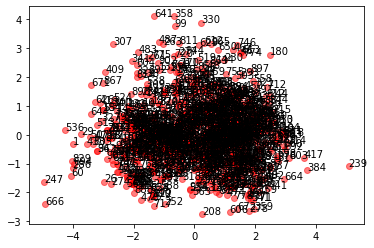

In [10]:
plt.plot(data_pca[0],data_pca[1], 'ro', alpha = 0.5)
for i in range(len(data_pca)):
    plt.text(data_pca.loc[i][0], data_pca.loc[i][1], str(i)) # cereal_data['name']) # 

plt.show()

In [11]:
data_pca

,0,1
0,-1.98,-0.12
1,-4.01,-0.32
2,1.03,-1.12
3,1.15,0.49
4,-1.27,-0.54
...,...,...
975,1.57,-1.15
976,0.59,-0.82
977,0.31,-0.09
978,2.73,-0.80


In [13]:
# own data 

our_data = pd.read_csv('Datasets/own_trip_advisor_avg.csv')

# Basic problem is our mall value was too small compared to the other data points (since its stdev was low)
# so decided to drop 'Mall'

our_data.head()

,User ID,Church,Resort,Beach,Park,Theatre,Museum,Mall,Zoo,Restaurant,Pubs/bars
0,Self,2.42,1.49,3.27,1.12,2.34,0.15,1.45,2.78,2.21,1.34


In [14]:
test_data = pd.DataFrame(sc.transform(our_data[cols]), columns = our_data[cols].columns, index = our_data.index)
test_data.head()

,Church,Resort,Beach,Park,Theatre,Museum,Zoo,Restaurant,Pubs/bars
0,4.67,0.29,2.86,2.10,3.20,-3.14,-0.40,1.76,-4.54


In [15]:
our_pca = pd.DataFrame(pca.transform(test_data), index = test_data.index)
our_pca.head()

,0,1
0,-3.81,-0.67


In [16]:
data_pca['dist'] = ((data_pca[0]-our_pca[0].values)**2+(data_pca[1]-our_pca[1].values)**2)**0.5
data_pca

,0,1,dist
0,-1.98,-0.12,1.91
1,-4.01,-0.32,0.41
2,1.03,-1.12,4.86
3,1.15,0.49,5.09
4,-1.27,-0.54,2.54
...,...,...,...
975,1.57,-1.15,5.40
976,0.59,-0.82,4.40
977,0.31,-0.09,4.16
978,2.73,-0.80,6.54


In [17]:
data_pca['dist'].min()
np.argmin(data_pca['dist'])

0.32298474042541087

829

In [18]:
data_pca.loc[829]

0      -4.02
1      -0.91
dist    0.32
Name: 829, dtype: float64

In [19]:
travel_data[cols + ['Mall']].mean()
travel_data[cols + ['Mall']].std()

Church       0.89
Resort       1.35
Beach        1.01
Park         0.53
Theatre      0.94
Museum       1.84
Zoo          2.84
Restaurant   1.57
Pubs/bars    2.80
Mall         3.18
dtype: float64

Church       0.33
Resort       0.48
Beach        0.79
Park         0.28
Theatre      0.44
Museum       0.54
Zoo          0.14
Restaurant   0.36
Pubs/bars    0.32
Mall         0.01
dtype: float64